# Time Analysis prediction 

using the regrssion techniques can you predict the future of the [stock](../datasets/Financial Data - Forex.zip) market based on the history of it ?

![Time analysis](../res/timeseries.png)

it would be great to predict one day in the future, one month and one year !

In [122]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [123]:
df = pd.read_csv("../datasets/Financial Data - Forex/EURUSD_15m_BID_01.01.2010-31.12.2016.csv")

In [124]:
df.head()

,Time,Open,High,Low,Close,Volume
0,2010-01-01 00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
1,2010-01-01 00:15,1.43285,1.43295,1.43229,1.43275,535600003.2
2,2010-01-01 00:30,1.43280,1.43303,1.43239,1.43281,436299999.2
3,2010-01-01 00:45,1.43285,1.43294,1.43229,1.43276,614299997.3
4,2010-01-01 01:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [127]:
df['Time'] = pd.to_datetime(df['Time'])

In [128]:
df.set_index(df['Time'], inplace=True)

In [129]:
df.head()

,Time,Open,High,Low,Close,Volume
Time,,,,,,
2010-01-01 00:00:00,2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
2010-01-01 00:15:00,2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2
2010-01-01 00:30:00,2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2
2010-01-01 00:45:00,2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3
2010-01-01 01:00:00,2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [130]:
days_df = df.resample('d').mean()

In [131]:
months_df = df.resample('m').mean()

In [133]:
years_df = df.resample('y').mean()

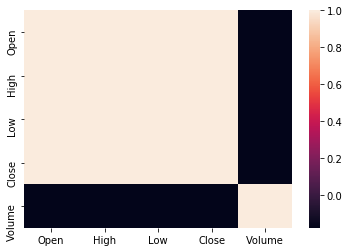

In [149]:
corr = df.corr()
sb.heatmap(corr)

In [135]:
def getPolynomial(data, degree=1):
    if degree ==1:
        return data
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    poly_features = poly.fit_transform(data)
    return poly_features

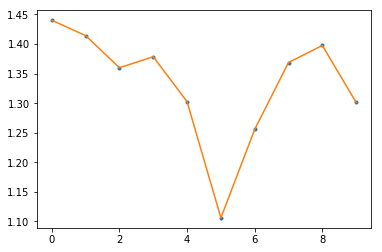

0.99999993525255615

In [159]:
days_train_data = days_df.iloc[:, [0,1,2,4]].values
days_goal_data = days_df.iloc[:, 3].values
train_set, test_set, goal_train, goal_test = train_test_split(days_train_data, days_goal_data, test_size =0.2, random_state = 0)
model = LinearRegression()
model.fit(getPolynomial(train_set, 1), goal_train)
goal_predict = model.predict(getPolynomial(test_set, 1))
plt.plot(goal_test[:10],'.', goal_predict[:10], '-')
plt.show()
model.score(getPolynomial(train_set, 1), goal_train)

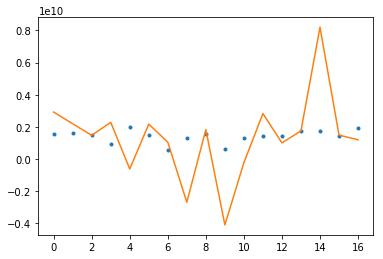

0.96547693095176723

In [163]:
months_train_data = months_df.iloc[:, :-1].values
months_goal_data = months_df.iloc[:, -1].values
train_set, test_set, goal_train, goal_test = train_test_split(months_train_data, months_goal_data, test_size =0.2, random_state = 0)
model = LinearRegression()
model.fit(getPolynomial(train_set, 6), goal_train)
goal_predict = model.predict(getPolynomial(test_set, 6))
plt.plot(goal_test,'.', goal_predict, '-')
plt.show()
model.score(getPolynomial(train_set, 6), goal_train)

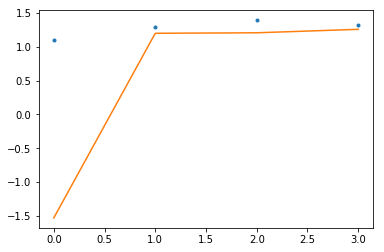

1.0

In [155]:
years_train_data = years_df.iloc[:, [0,1,2,4]].values
years_goal_data = years_df.iloc[:, 3].values
train_set, test_set, goal_train, goal_test = train_test_split(years_train_data, years_goal_data, test_size =0.5, random_state = 0)
model = LinearRegression()
model.fit(getPolynomial(train_set, 2), goal_train)
goal_predict = model.predict(getPolynomial(test_set, 2))
plt.plot(goal_test,'.', goal_predict, '-')
plt.show()
model.score(getPolynomial(train_set, 2), goal_train)